In [1]:
"""
Optimizing threshold for private multiplicative weights
Author: Albert Sun 7/13/2021
"""
from src.hdmm import workload, fairtemplates, error, fairmechanism, matrix, mechanism, templates
from implementations import pmw, pmw_optimized
import numpy as np

## Intialize Workloads


In [2]:
W_identity = workload.Identity(8).dense_matrix()
W_allrange = workload.AllRange(8).dense_matrix()
W_total = workload.Total(8).dense_matrix()

W_five_identity = np.vstack((W_identity, W_identity, W_identity, W_identity, W_identity))
W_sd = np.vstack((W_identity, W_allrange))
W_ds = np.vstack((W_allrange, W_identity))
W_sds = np.vstack((W_identity, W_allrange, W_identity))
W_dsd = np.vstack((W_allrange, W_identity, W_allrange))
W_random = np.random.permutation(W_sd)

## Initialize Databases


In [3]:
#x = np.array([1000, 1210, 1300, 1250, 1500, 1450, 1700, 1720])
x = np.array([1000, 8000, 1300, 1250, 9000, 1450, 1700, 1720])
x/sum(x)

array([0.0393391 , 0.31471282, 0.05114083, 0.04917388, 0.35405193,
       0.0570417 , 0.06687648, 0.06766326])

## Implementations

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
workload: 
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1.

[0.125,
 0.30963963210603107,
 0.12511735240139552,
 0.12511735240139552,
 0.3393848603255132,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.32416419010886427,
 0.12535183478939738,
 0.12535183478939738,
 0.35679047155755683,
 0.12546896270234803,
 0.12546896270234803,
 0.12546896270234803,
 0.12546896270234803,
 0.3116306602982414,
 0.12558542837542097,
 0.12558542837542097,
 0.34484190074554794,
 0.12570211046624905,
 0.12570211046624905,
 0.12570211046624905,
 0.12570211046624905,
 0.31410778646193693,
 0.12581813161544736,
 0.12581813161544736,
 0.35510748022866206,
 0.12593436713404177,
 0.12593436713404177,
 0.12593436713404177,
 0.12593436713404177,
 0.33164249890463976,
 0.1260499430275195,
 0.1260499430275195,
 0.35883749313192403,
 0.12616573125473568,
 0.12616573125473568,
 0.12616573125473568]

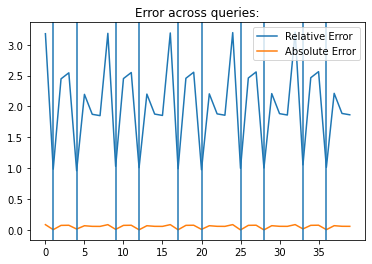

In [4]:
pmw(W_five_identity, x)

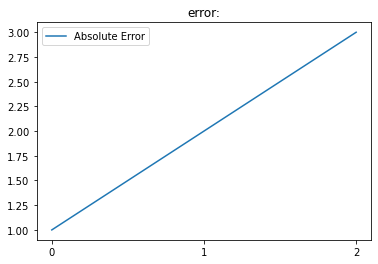

In [5]:
from matplotlib import pyplot as plt
x_axis = range(5)
error = np.arange(5)
plt.title('error:')
plt.xticks(x_axis)
line_up, = plt.plot([1, 2, 3], label='Absolute Error')
plt.legend(handles=[line_up])